<h1>Peter Zudor Big Data Assignment</h1>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

!jupyter labextension install jupyterlab-plotly

In this analysis I will be looking at wheat grains originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin, using soft X-ray imaging.

<h1>Visualizations</h1>

In [2]:
features = ['Area','Perimeter',
            'Compactness','Length of Kernel',
            'Width of Kernel','Asymmetry Coefficient',
            'Length of Kernel Groove', 'Classification']

df = pd.read_csv('data_23.csv', delimiter=',', names=features, skiprows=1)

In [3]:
df.head()

Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Length of Kernel Groove  Classification  
0                  2.221                    5.220               1  
1                  1.018                    4.956               1  
2                  2.699                    4.825               1  
3                  2.259                    4.805               1  
4                  1.355                    5.175               1

In [4]:
df.describe()

Area   Perimeter  Compactness  Length of Kernel  Width of Kernel  \
count  210.000000  210.000000   210.000000        210.000000       210.000000   
mean    14.847524   14.559286     0.870999          5.628533         3.258605   
std      2.909699    1.305959     0.023629          0.443063         0.377714   
min     10.590000   12.410000     0.808100          4.899000         2.630000   
25%     12.270000   13.450000     0.856900          5.262250         2.944000   
50%     14.355000   14.320000     0.873450          5.523500         3.237000   
75%     17.305000   15.715000     0.887775          5.979750         3.561750   
max     21.180000   17.250000     0.918300          6.675000         4.033000   

       Asymmetry Coefficient  Length of Kernel Groove  Classification  
count             210.000000               210.000000      210.000000  
mean                3.700201                 5.408071        2.000000  
std                 1.503557                 0.491480        0.818448  
min                 0.765100                 4.519000        1.000000  
25%                 2.561500                 5.045000        1.000000  
50%                 3.599000                 5.223000        2.000000  
75%                 4.768750                 5.877000        3.000000  
max                 8.456000                 6.550000        3.000000

The wheat kernels belong to three different varieties: Kama, Rosa and Canadian, with 70 elements each. The features are: 
area: Area measurements of the grains
perimeter: Perimeter of grain
compactness: Compactness metric of the grains calculated as 4*pi*A/P^2
length of kernel: length measurement of the wheat kernel
width of kernel: width measurment
asymmetry coefficient: asymmetry measure of each grain
length of kernel groove: the length of the groove only
classification: which type of grain

NOTE: the classification attribute is also numerical, I will make the assumption based on the order in description that Kama, Rosa and Canadian are 1, 2 and 3 respectively. 
Since the data is created by the Polish Academy I presume the metric system is used (in mm).

In [5]:
df.sample(5)

Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
99   18.72      16.34       0.8810             6.219            3.684   
16   13.99      13.83       0.9183             5.119            3.383   
103  19.18      16.63       0.8717             6.369            3.681   
54   14.52      14.60       0.8557             5.741            3.113   
32   14.09      14.41       0.8529             5.717            3.186   

     Asymmetry Coefficient  Length of Kernel Groove  Classification  
99                   2.188                    6.097               2  
16                   5.234                    4.781               1  
103                  3.357                    6.229               2  
54                   1.481                    5.487               1  
32                   3.920                    5.299               1

At first glance the data looks normal enough with no obvious anomalies such as outliers, extreme values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetry Coefficient    210 non-null    float64
 6   Length of Kernel Groove  210 non-null    float64
 7   Classification           210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [7]:
df['Classification'].value_counts()

1    70
2    70
3    70
Name: Classification, dtype: int64

No null values and each class has 70 instances as promised in the description. 

In [8]:
types = {1:'Kama', 2:'Rosa', 3:'Canadian'}
df['Kernel Type'] = df['Classification'].map(types)
num_features = df.loc[:,:'Length of Kernel Groove'].columns.to_list()

Let's begin with a histogram on each feature by Kernel Types. 

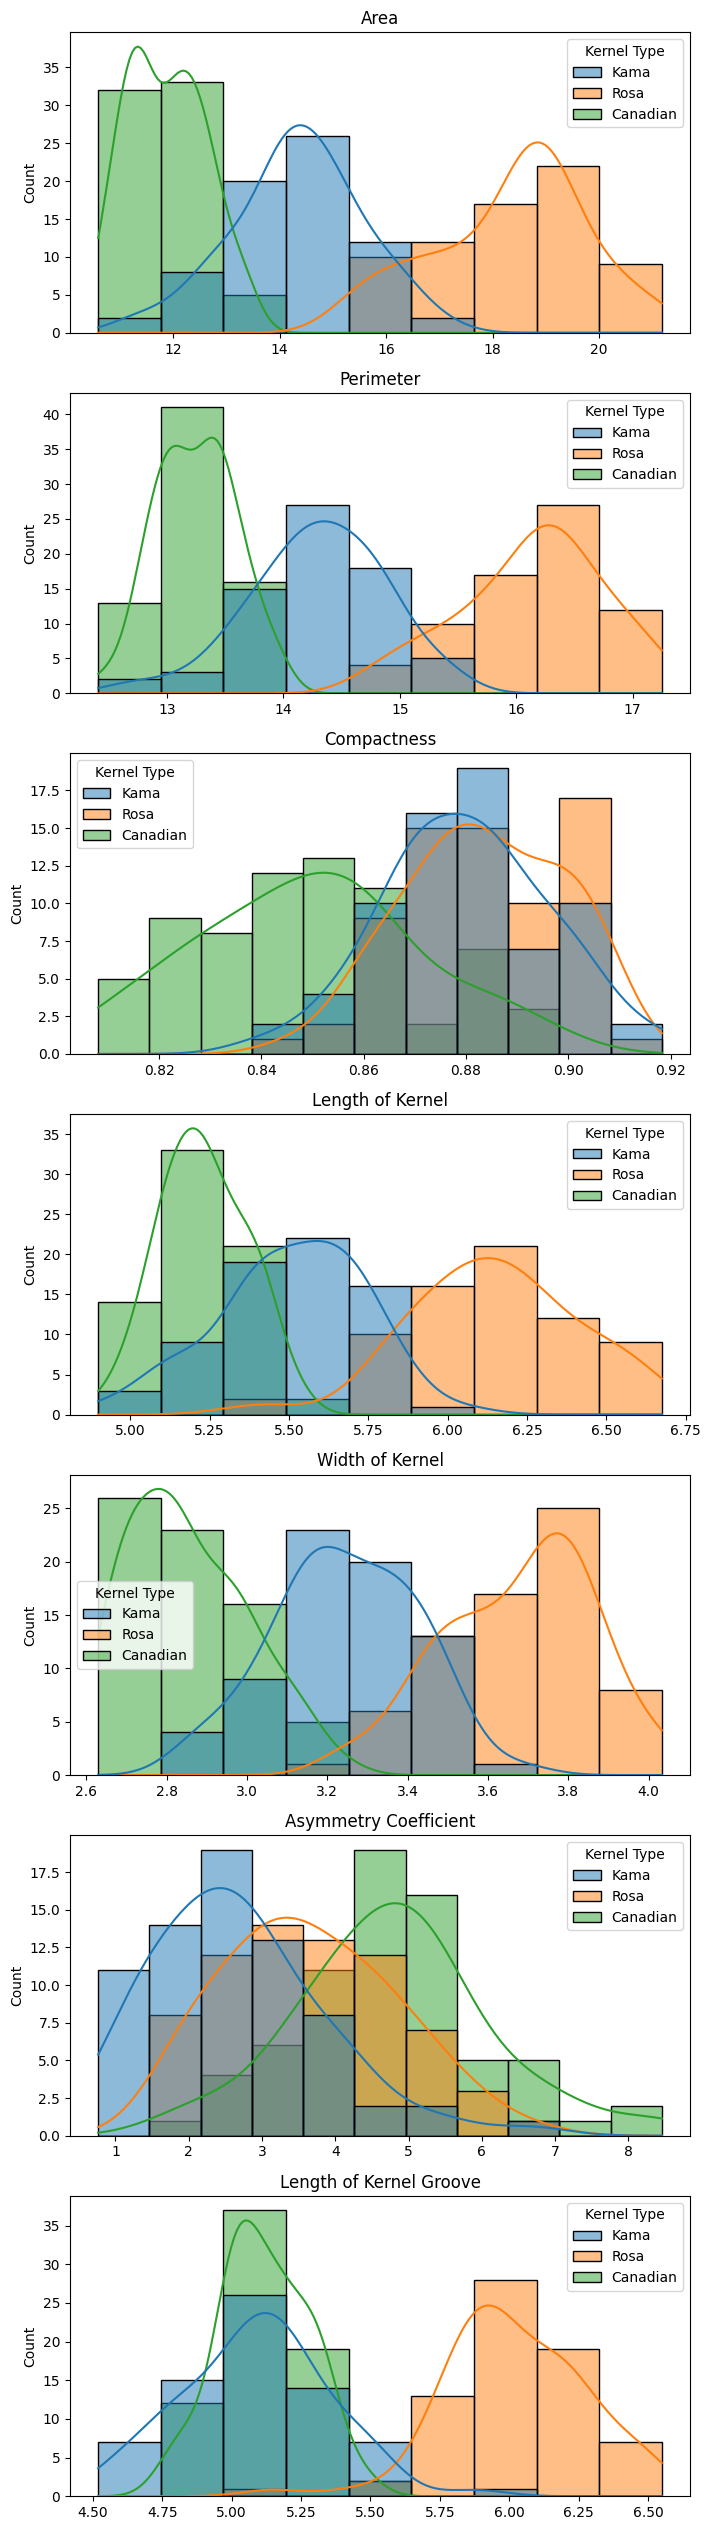

In [9]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 32))

for i, feature in enumerate(num_features):
    ax = axes[i]
    sns.histplot(data=df, x=feature, ax=ax, kde=True, hue='Kernel Type')
    ax.set(xlabel=None)
    ax.set_title(feature)

We can already see that Rosa is the most distinct & separable in the group on various metrics. Kama and Canadian have smaller differences all throughout and may be difficult to separate to well defined clusters.

Let's plot out the features - Asymmetry Coefficicent and Compactness - wherein the wheat types align too much clear visibility.

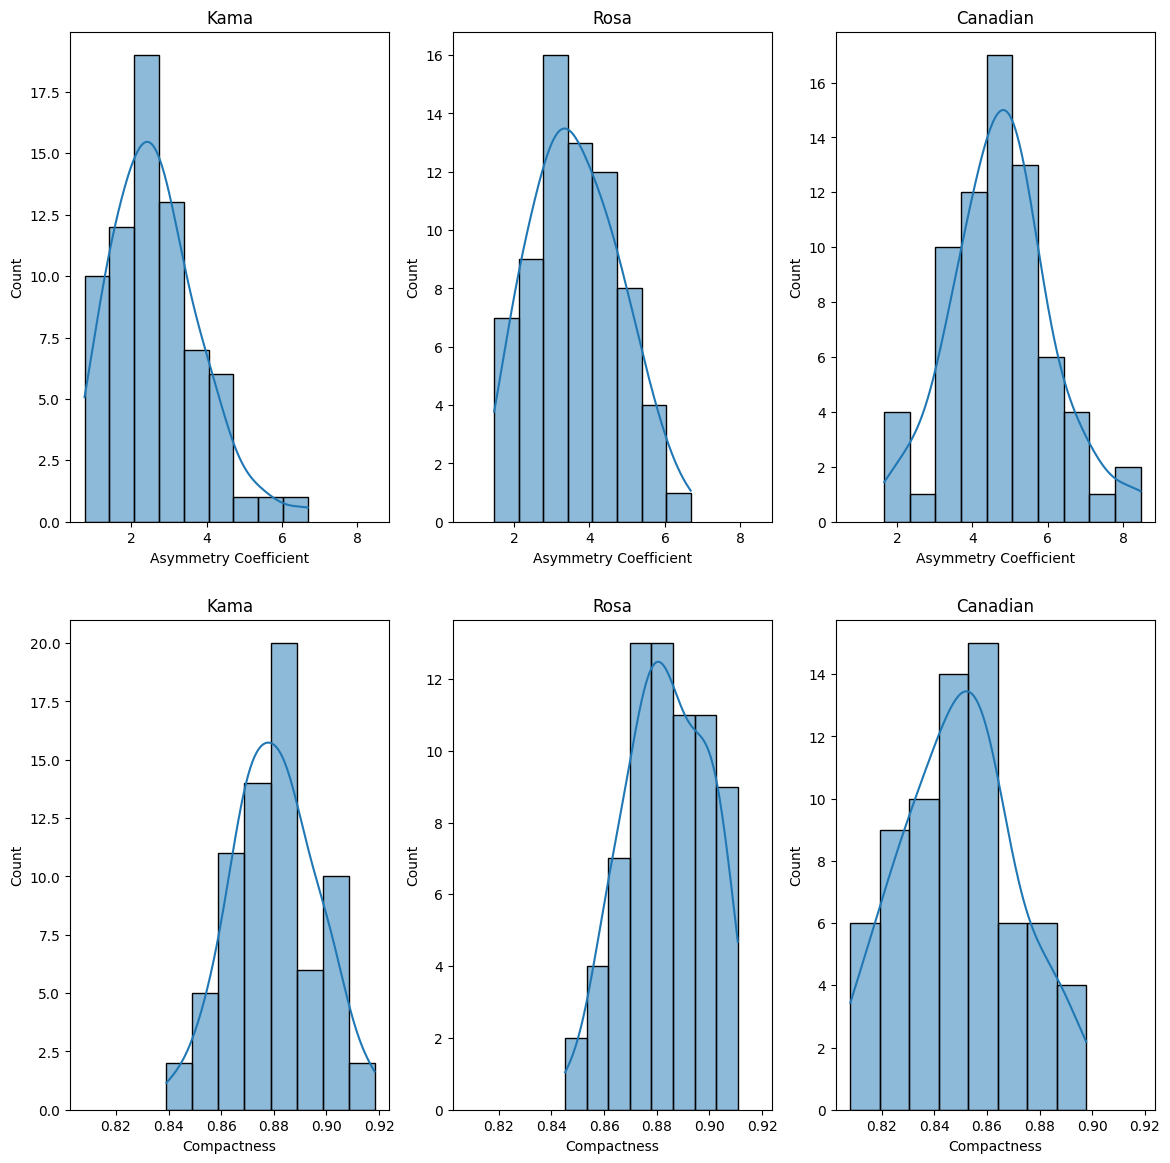

In [10]:
select_features = ['Asymmetry Coefficient', 'Compactness']
fig, axes = plt.subplots(nrows=len(select_features), ncols=3, sharex='row', figsize=(14, 14))

for i, feature in enumerate(select_features):
    for j, wheat_type in types.items():
        ax = axes[i,j-1]
        sns.histplot(data=df[df['Kernel Type'] == wheat_type], x=feature, ax=ax, kde=True)
        ax.set_title(wheat_type)

Clearer visibility, and a glimpse of hope in the Asymmetry Coef attr, as the Kama and Canadian relatively differ.

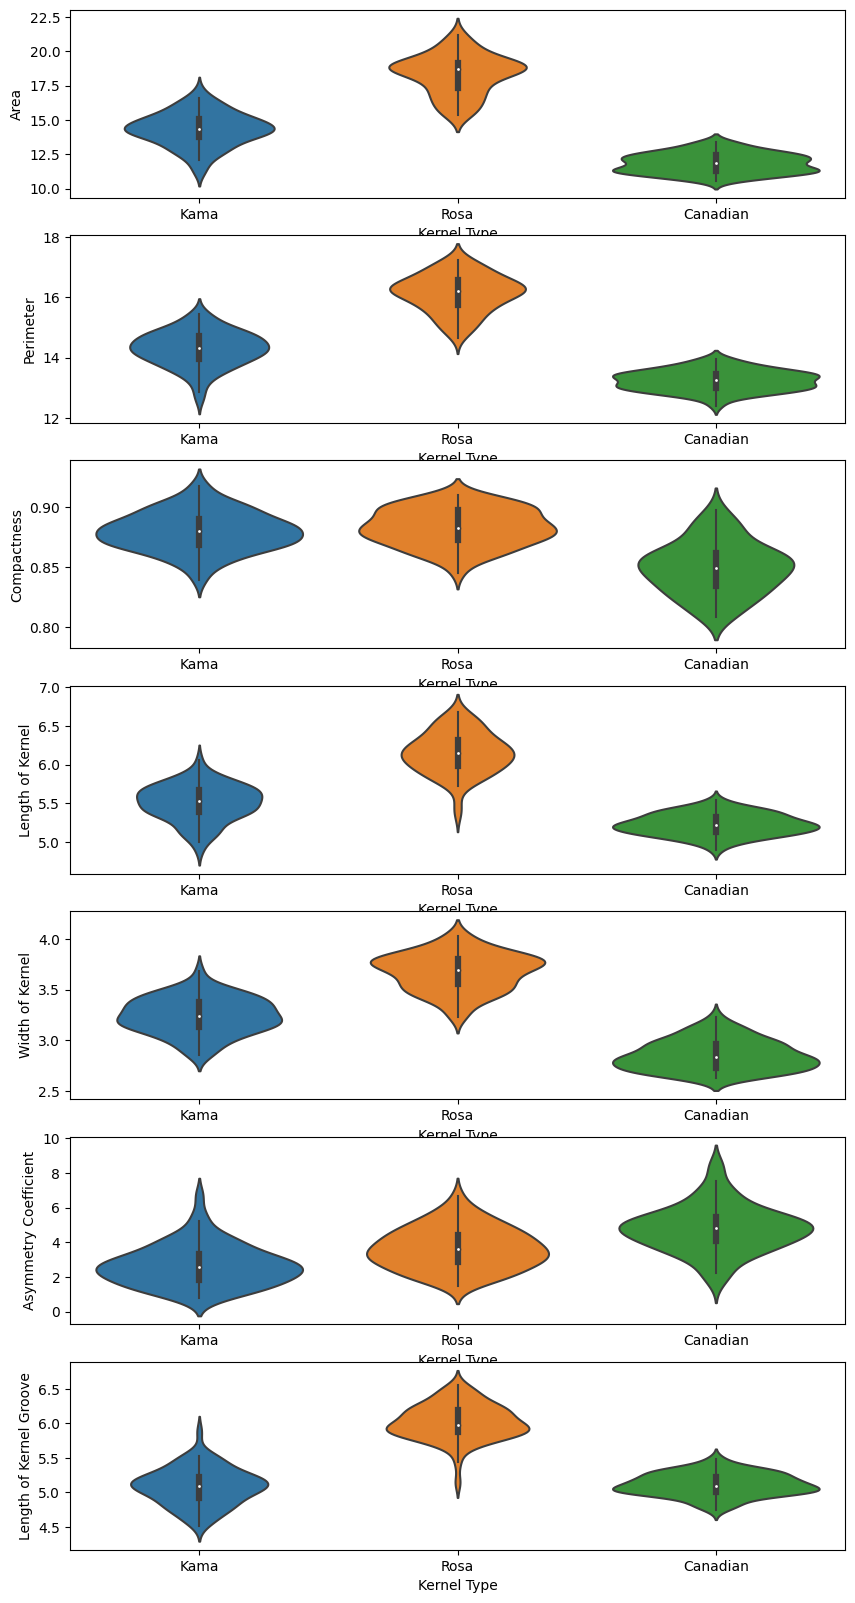

In [11]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10,20))

for i, feature in enumerate(num_features):
    ax = axes[i]
    sns.violinplot(data=df, x='Kernel Type', y=feature, ax=ax)

Based on the beautiful (mostly) humming-top shapes (and not stingrays) I infer the measurements are valid and follow standard Gaussian distribution with no major outliers.
Type Rosa quite visibly differ from the other two, while Kama and Canadian might be best separable based on Width of Kernel and Area features.

Let's see a correlation matrix in the form of a heatmap.

<AxesSubplot: >

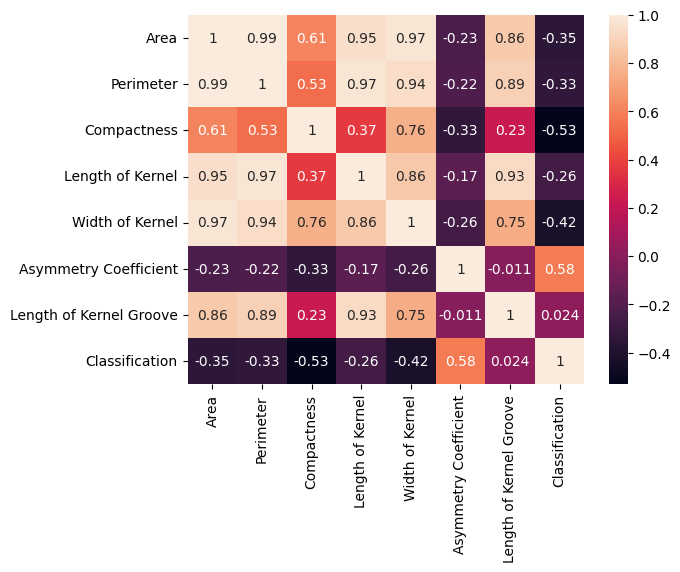

In [12]:
corr = df.loc[:,:'Classification'].corr()
sns.heatmap(corr, annot=True)

Although we see very high cross-correlation values it is expected as we're analyzing geometrical measurements. More surprising are the lower values, especially in Compactness, as it has a higher correlation value with kernel width rather than area and perimeter from what it derives. 
It is also visible that Compactness and Asymmetry Coef correlate with Classification, which I did not expect given the previous plots.

To begin clustering let's see the result of the pairplot hued by Class.

In [13]:
from sklearn.feature_selection import mutual_info_regression

X = df.copy().drop('Kernel Type', axis=1)
y = X.pop('Classification')
discrete_features = y

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features='auto')
mi_scores

Area                       0.810234
Perimeter                  0.794367
Width of Kernel            0.730218
Length of Kernel           0.643959
Length of Kernel Groove    0.584375
Compactness                0.292453
Asymmetry Coefficient      0.182567
Name: MI Scores, dtype: float64

To be fair I only learned the mutual info method after completing the analysis, yet I felt the inclination to insert it where I would've used it, as it is superior to correlation - when focusing on a discrete target feature -, because mutual info looks at non-linear relationships as well.

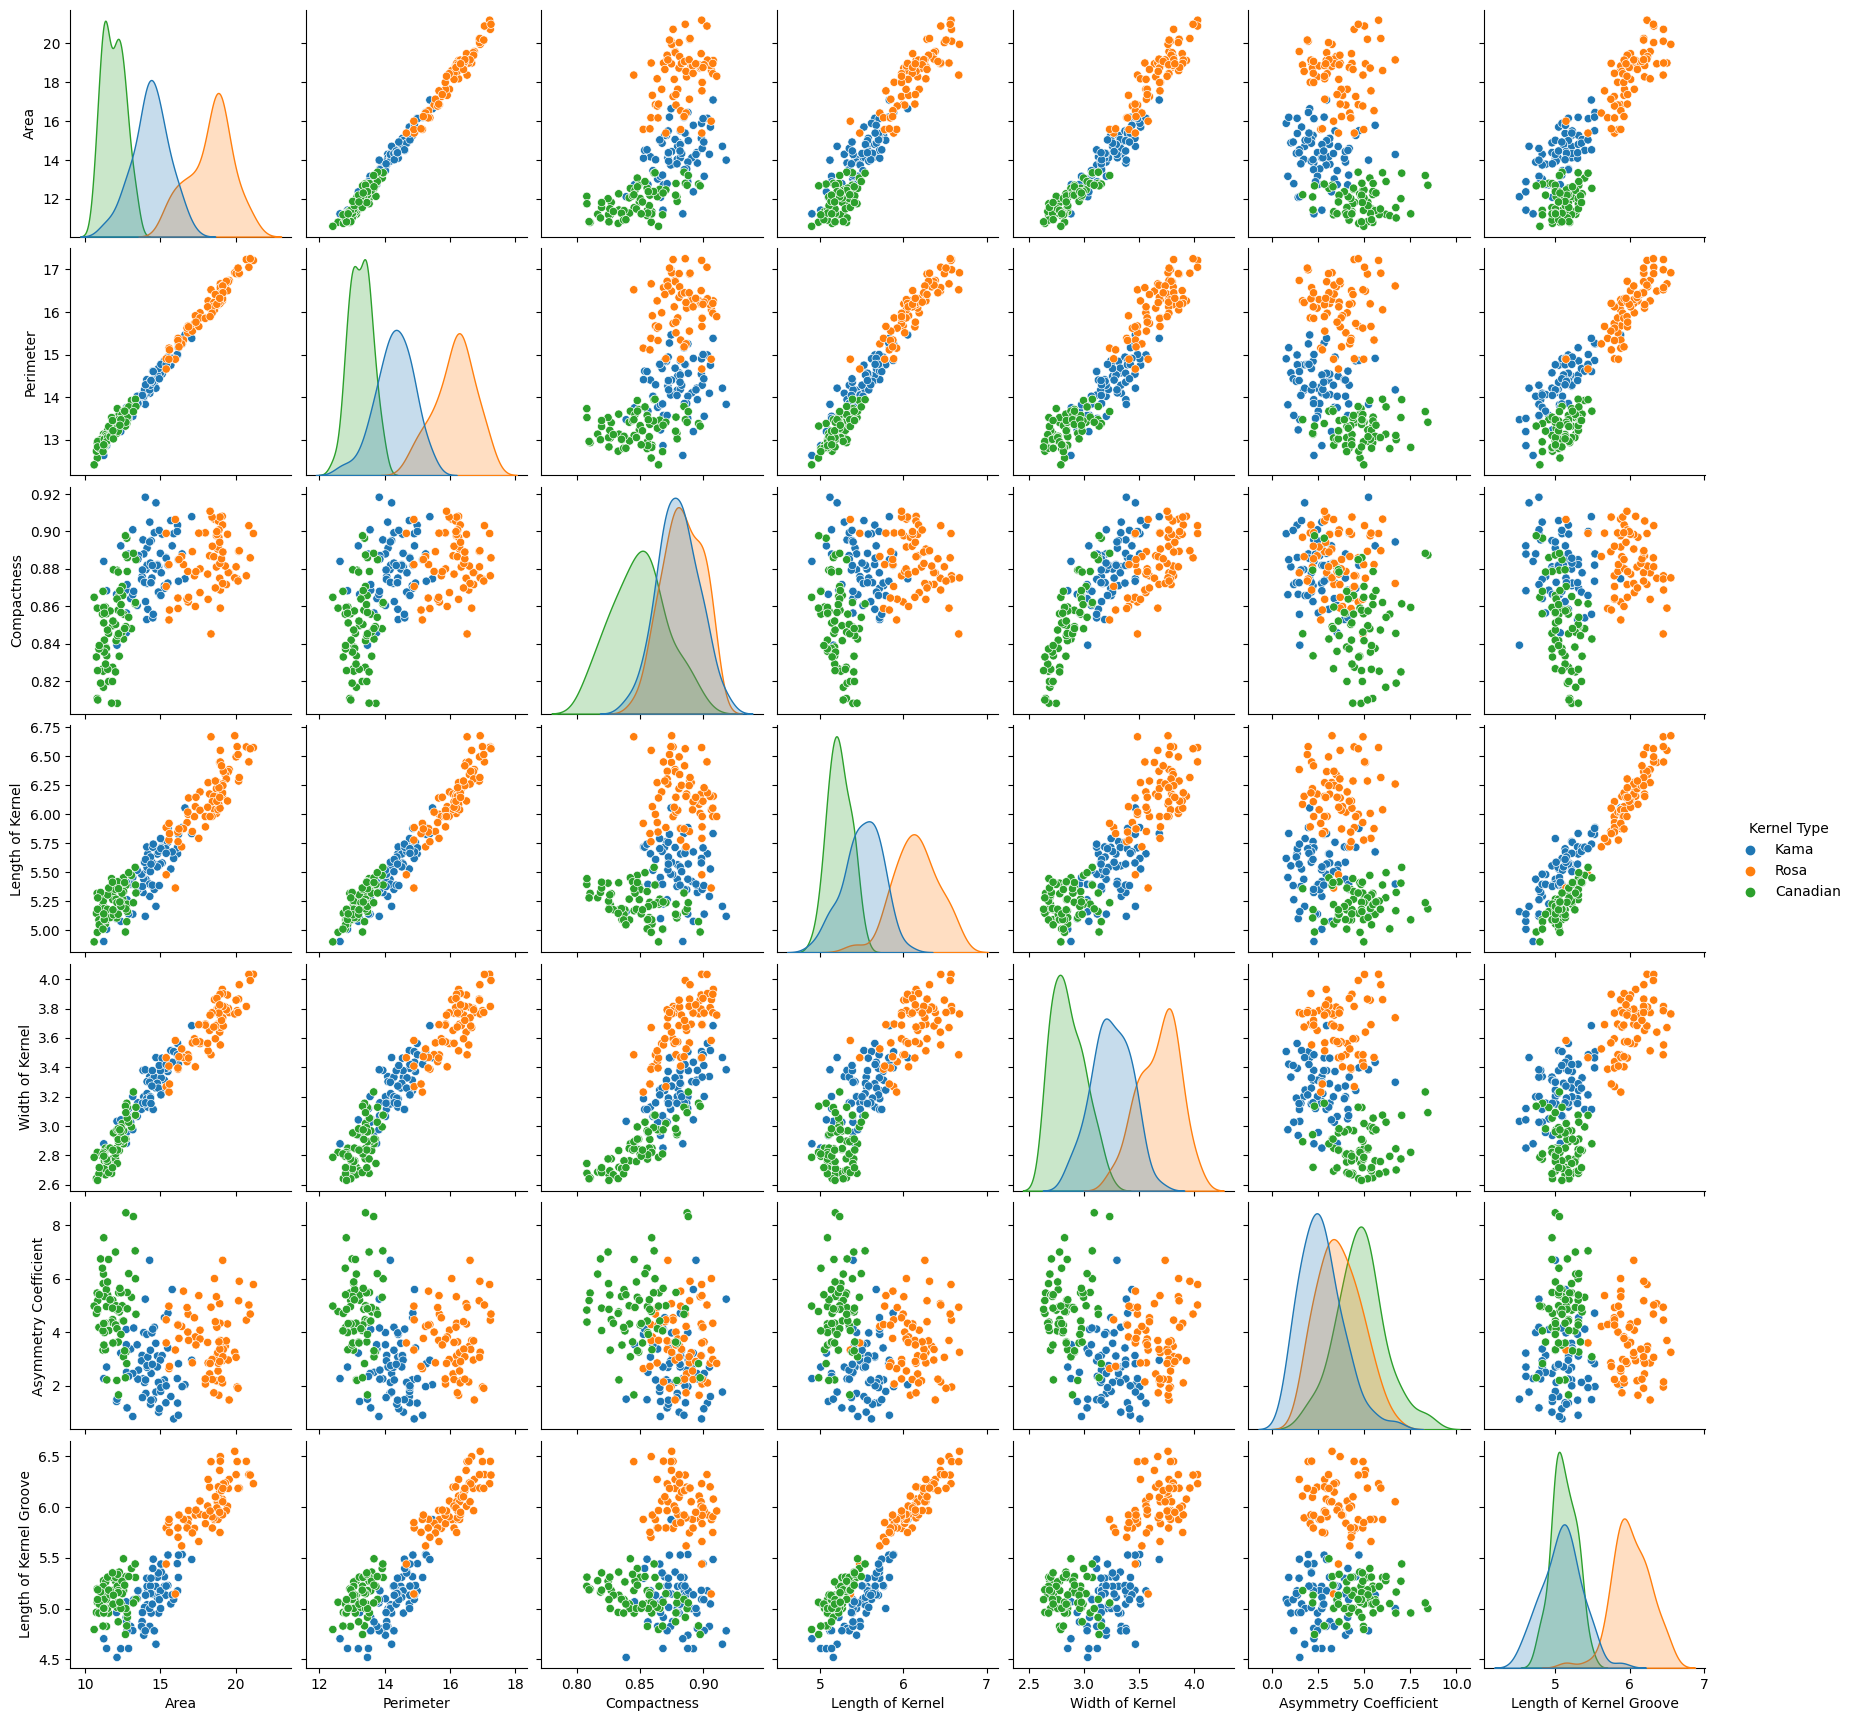

In [14]:
feat = num_features + ['Kernel Type']
sns.pairplot(df[feat], hue='Kernel Type')
#sns.pairplot(df.loc[:,:'Classification'], hue='Classification')

Based on the previous corr matrix, we can indeed see multiple candidates for good linear regression models, however there are a few interesting plots, let us plot them more visibly and dissect them below:

<AxesSubplot: xlabel='Compactness', ylabel='Asymmetry Coefficient'>

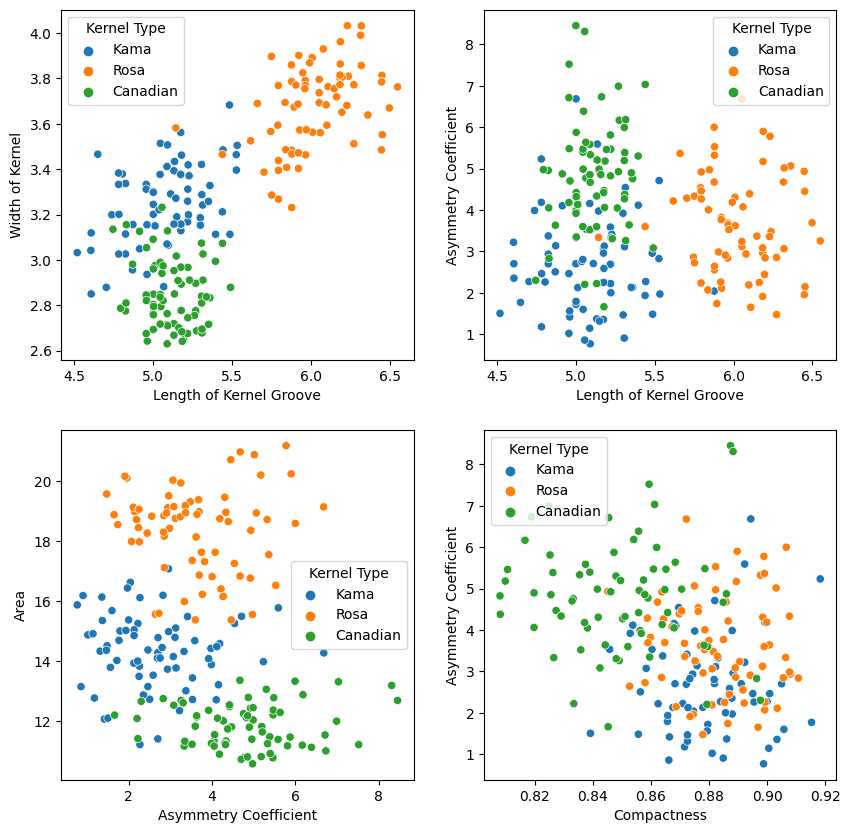

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.scatterplot(data=df, x='Length of Kernel Groove', y='Width of Kernel', hue='Kernel Type', ax=ax[0,0])
sns.scatterplot(data=df, x='Length of Kernel Groove', y='Asymmetry Coefficient', hue='Kernel Type', ax=ax[0,1])
sns.scatterplot(data=df, x='Asymmetry Coefficient', y='Area', hue='Kernel Type', ax=ax[1,0])
sns.scatterplot(data=df, x='Compactness', y='Asymmetry Coefficient', hue='Kernel Type', ax=ax[1,1])

Top left: good candidate for clustering, although Kama and Canadian are close on the Length axis the Width almost separates them into distinct clusters. 
Top right: could be used for clustering but maybe Kama and Canadian aren't clumped close enough.
Bottom left: good candidate, the groups separate very well with only a slight cross-leakage, however the samples are'nt close to each other.
Bottom right: highest correlation values with Class but the opposite sign mushes most points close together. 

Let's squeeze more info on the plots.

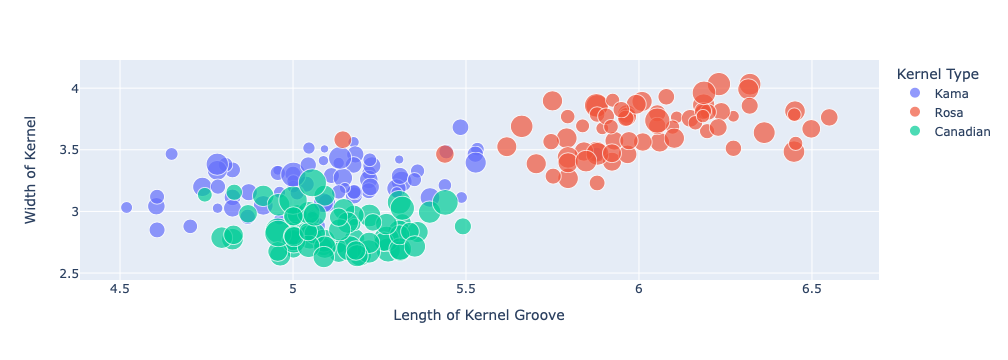

In [16]:
fig1 = px.scatter(df, x="Length of Kernel Groove", y="Width of Kernel", color="Kernel Type",
                 size="Asymmetry Coefficient")
fig1.show()

First good candidate recreated where the Size of each dot is relative to the kernel's asymmetry coef.

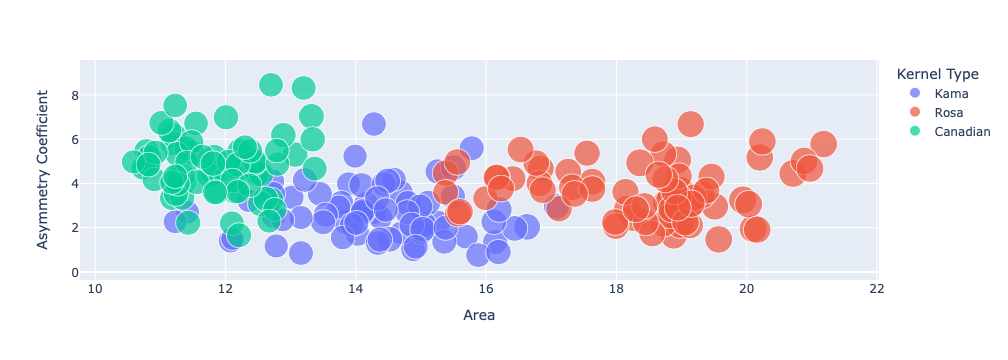

In [17]:
fig1 = px.scatter(df, x="Area", y="Asymmetry Coefficient", color="Kernel Type",
                 size="Length of Kernel Groove")
fig1.show()

Second good candidate recreated (with inverted axes), also "3D" plot where the sizes correspond to Groove Length. Maybe Not as intuitive as I had hoped.

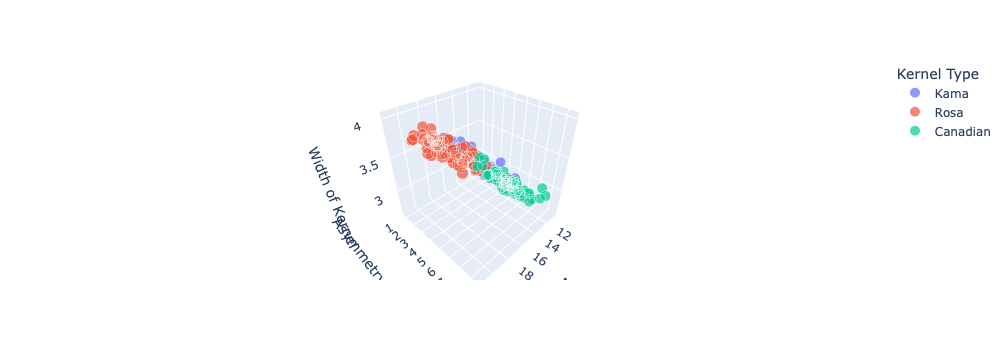

In [18]:
fig2 = px.scatter_3d(df, x="Area", y="Asymmetry Coefficient",z="Width of Kernel",
                     color="Kernel Type",size="Length of Kernel Groove")
fig2.show()

The graph isn't as useful for clustering as it will be for Linear Regression. 

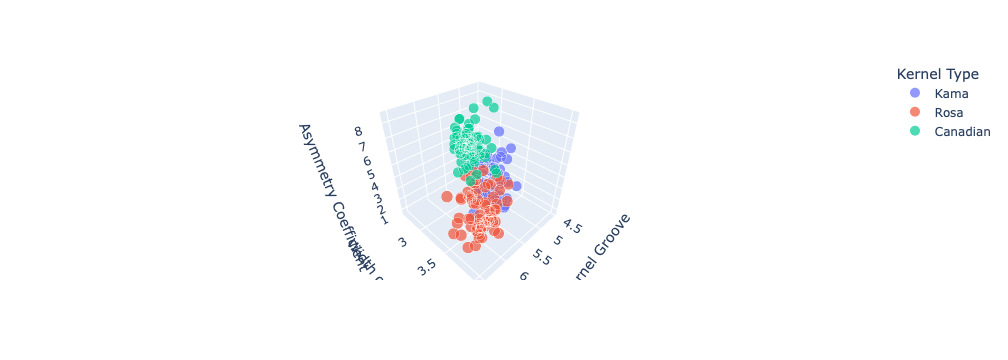

In [19]:
fig2 = px.scatter_3d(df, x="Length of Kernel Groove", y="Width of Kernel",z="Asymmetry Coefficient",
                     color="Kernel Type",size="Length of Kernel")
fig2.show()

This 3D representation is as good as it gets for the base of clustering without introducing transformations, or feature interactions.

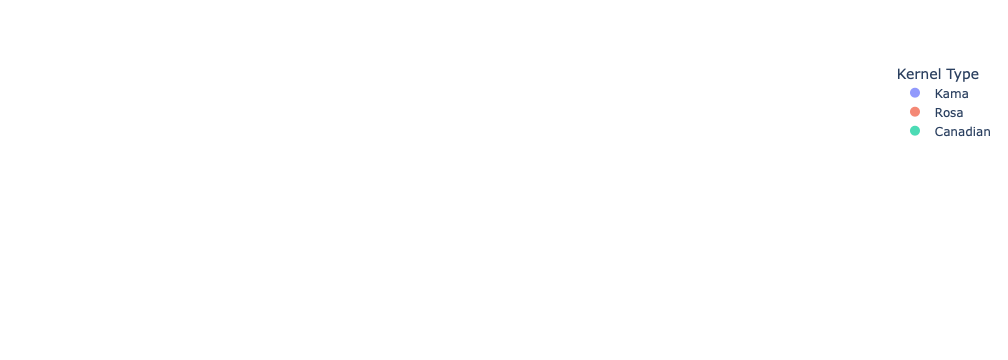

In [20]:
fig2 = px.scatter_3d(df, x="Asymmetry Coefficient", y="Length of Kernel Groove",z="Width of Kernel",
                     color="Kernel Type",size="Length of Kernel")
fig2.show()

After some good old fashioned trial and error this plot also gives us a glimpse against which features could clustering work well.

<h1>Clustering</h1>

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on their density. It can find clusters of any shape and effectively handle noisy data.

DBSCAN identifies dense regions of data points separated by less dense areas. It considers points with many nearby neighbors as core points and expands clusters by connecting dense regions.

Core Points: Have enough neighboring points within a specified distance (eps parameter).
Border Points: Have fewer neighbors than the core point requirement but can be reached from a core point (min_samples parameter).
Noise Points: Neither core nor border points.

Starts with a point, explores its neighborhood, and expands the cluster by connecting core points to their reachable neighbors. This process continues until the cluster is fully expanded.

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
X = df[['Length of Kernel Groove','Width of Kernel']]
X.sample(10)

Length of Kernel Groove  Width of Kernel
187                    4.956            2.675
19                     4.914            3.049
3                      4.805            3.379
71                     5.877            3.484
109                    5.894            3.674
94                     6.448            3.485
65                     4.607            3.119
188                    4.957            2.821
87                     6.498            3.670
54                     5.487            3.113

Text(0.5, 1.0, 'Real Distribution')

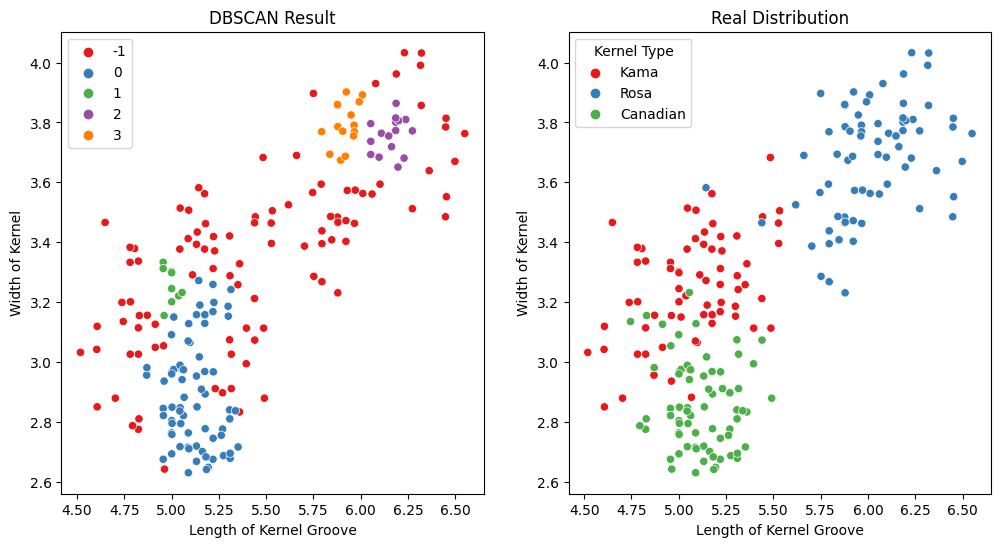

In [23]:
db = DBSCAN(eps=0.102, min_samples=10)
db.fit(X)
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(x=df['Length of Kernel Groove'], y=df['Width of Kernel'], hue=db.labels_, palette='Set1', ax=ax[0])
ax[0].set_title('DBSCAN Result')
sns.scatterplot(x=df['Length of Kernel Groove'], y=df['Width of Kernel'], hue=df['Kernel Type'], palette='Set1', ax=ax[1])
ax[1].set_title('Real Distribution')

After some careful parameter tuning it seems the groups are too close on raw data. The algorithm found 4 groups but a lot of points are considered noise. Let's try a different algorithm.

KMeans is an unsupervised machine learning algorithm for partitioning data into distinct clusters. It aims to minimize the sum of squared distances between data points and their corresponding cluster centroids.

Step1: Starts by randomly selecting K initial cluster centroids. 
Step2: Each data point is assigned to the nearest centroid based on the Euclidean distance metric. This creates K clusters, with each point belonging to the cluster associated with the closest centroid. 
Step3: The centroid of each cluster is updated by calculating the mean of all the data points assigned to that cluster. This moves the centroid to the center of the cluster, representing the average location of the data points within that cluster. Step4: Rinse and repeate Steps2 and 3 until convergence. 
Step5: The final outcome of K-means clustering is a set of K clusters, each represented by its centroid. Data points are grouped together based on their proximity to the centroids, aiming to minimize the within-cluster sum of squared distances.

Main parameter to consider is the number of clusters (K) to create. It is often determined through domain knowledge, experimentation, or techniques such as the elbow method or silhouette analysis. (I will be using the elbow method here.)

In [24]:
from sklearn.cluster import KMeans

<AxesSubplot: >

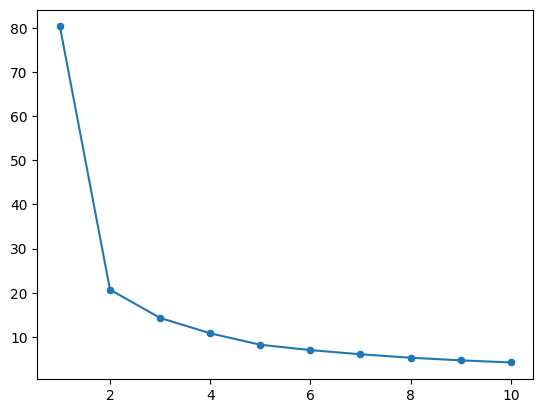

In [25]:
err = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Length of Kernel Groove', 'Width of Kernel']])
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)

sns.lineplot(x=err[:,0], y=err[:,1])
sns.scatterplot(x=err[:,0], y=err[:,1])

The elbow method results in 2 clusters. Let's however, plot the kmeans with both 2 and 3 as cluster parameters.

In [26]:
def fit_cluster(data,n_clusters=1):
    kmeans = KMeans(n_clusters)
    kmeans.fit(data)
    return kmeans

def plot_cluster(kmeans,ax, x='x_col', y='y_col'):
    sns.scatterplot(data=df, x='Length of Kernel Groove', y='Width of Kernel', hue=kmeans.labels_, marker='+', palette='Set1', ax=ax)
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', c='black',ax=ax)

In [27]:
kmeans = KMeans(n_clusters=2)

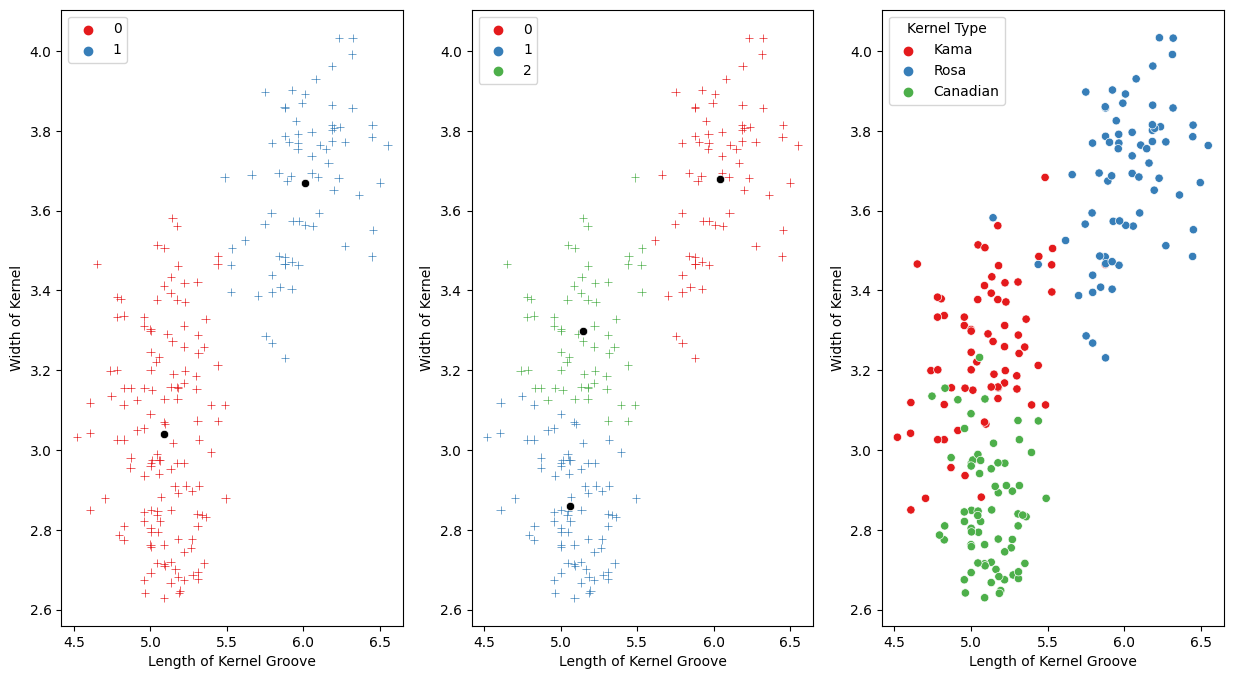

In [28]:
fig, ax = plt.subplots(ncols=3, figsize=(15,8))
x = 'Length of Kernel Groove'
y = 'Width of Kernel'
sns.scatterplot(data=df, x=x, y=y, hue='Kernel Type', hue_order=['Kama','Rosa','Canadian'], palette='Set1', ax=ax[2])
for i in range(2,4):
    kmeans = fit_cluster(df[[x, y]],n_clusters=i)
    plot_cluster(kmeans,ax=ax[i-2], x=x, y=y)

Although based on the elbow method 2 clusters would match the data best, if we force appropriately select 3 as parameter the algorithm separates the clusters relatively well according to the Kernel Types. 

In [29]:
import plotly.io as pio
import plotly.offline as pyo
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
X = df.loc[:,:'Length of Kernel Groove'].drop('Compactness',axis=1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=scaled_data, columns=X.columns)

pio.renderers.default = 'notebook'

kmeans = KMeans(
    n_clusters=3, init="k-means++",
    n_init=10,
    tol=1e-04, random_state=42
)
kmeans.fit(X)
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kmeans.labels_
polar = clusters.groupby("label").mean().reset_index()
polar = pd.concat([pd.melt(polar, id_vars=["label"], var_name="variable", value_name="value")])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True, height=800, width=1200)
pyo.plot(fig4, filename='cluster_plot.html')

'cluster_plot.html'

Sadly I could not make the plot appear in notebook, so see the output plot in the cwd as 'cluster_plot.html'. Also dropped Compactness since it didn't contribute anything to the plot. Let's see how well do the cluster labels correspond to actual Class values. 

Will be using Adjusted Rand Index (ARI) or the Fowlkes-Mallows Index (FMI). These metrics compare the clustering results with the true labels/class groups to assess the similarity between them. 

The ARI score ranges from -1 to 1, where 1 indicates perfect clustering alignment with the class groups, 0 indicates random clustering, and -1 indicates complete disagreement between the clustering and the class groups.

The FMI score ranges from 0 to 1, where 1 indicates perfect clustering alignment, and 0 indicates no alignment.

In [31]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

actual_labels = df['Kernel Type'].tolist()

ari_score = adjusted_rand_score(actual_labels, kmeans.labels_)
fmi_score = fowlkes_mallows_score(actual_labels, kmeans.labels_)

print("Adjusted Rand Index (ARI):", ari_score)
print("Fowlkes-Mallows Index (FMI):", fmi_score)


Adjusted Rand Index (ARI): 0.7166198557361053
Fowlkes-Mallows Index (FMI): 0.8106151670655933


We can see that general differences in features and respective classifications are relatively consistent on the data. Given the ARI < FMI difference between the two metrics we can assume there is a slight disagreement between the clustering and the class groups that pulls the ARI score down. 

In [32]:
df2 = df.copy()
df2['GroovexWidth'] = df2.apply(lambda row: (row['Length of Kernel Groove'] * row['Width of Kernel']), axis=1)
df2['GxW/AC'] = df2.apply(lambda row: (row['Length of Kernel Groove'] * row['Width of Kernel'] / row['Asymmetry Coefficient']), axis=1)
df2['CxW/AC'] = df2.apply(lambda row: (row['Compactness'] * row['Width of Kernel']) / row['Asymmetry Coefficient'], axis=1)
df2['AreaxAsymmetry'] = df2.apply(lambda row: (row['Area'] * row['Asymmetry Coefficient']), axis=1)
df2['Area+Asymmetry'] = df2.apply(lambda row: (row['Area'] + row['Asymmetry Coefficient']) / 2, axis=1)

In [33]:
#cols_to_plot = df.columns[:8].tolist() + ['GroovexWidth', 'GxWxA', 'GrooveWidth', 'AreaxAsymmetry', 'Area+Asymmetry']

Tried a few arbitrary feature engineering, however I will not be using these as they offered no improvement whatsoever.

<h1> Logistic Regression </h1>

As established earlier the geometric values have a strong correlation. However separating the dataset by classes proved to be more difficult, and so logistic regression seems more challenging. Looking at the previous plots, it's clear that linear boundaries will not be sufficient, so I will use 2nd degree polynomial models, using a One over the Rest approach.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [35]:
X = df[['Length of Kernel Groove', 'Width of Kernel']].to_numpy()
y = df['Kernel Type'].to_numpy()

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_reg = LogisticRegression(multi_class='ovr')
poly_reg.fit(X_poly, y)

LogisticRegression(multi_class='ovr')

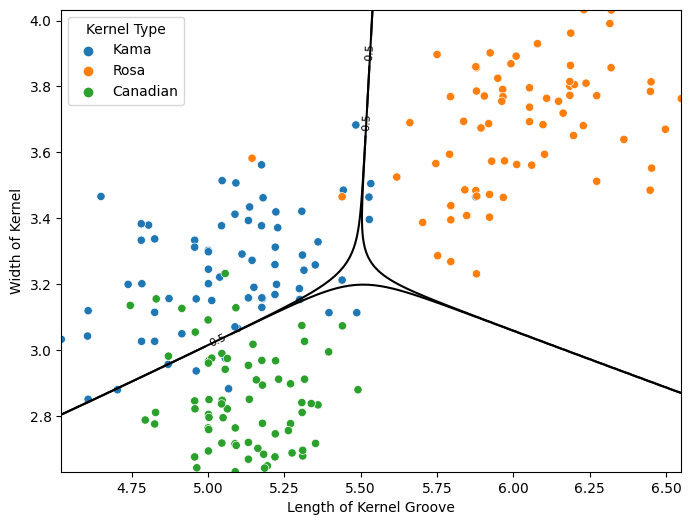

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Length of Kernel Groove',y='Width of Kernel',hue='Kernel Type', hue_order=['Kama','Rosa','Canadian'])

x1_values = np.linspace(df['Length of Kernel Groove'].min(), df['Length of Kernel Groove'].max(), 100)
x2_values = np.linspace(df['Width of Kernel'].min(), df['Width of Kernel'].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
X_poly_grid = poly_features.transform(X_grid)

proba_grid = poly_reg.predict_proba(X_poly_grid)

for i in range(proba_grid.shape[1]):
    proba_class = proba_grid[:, i].reshape(x1_grid.shape)
    contour = plt.contour(x1_grid, x2_grid, proba_class, levels=[0.5], colors='black')
    plt.clabel(contour, inline=True, fontsize=8)
    
plt.ylim(df['Width of Kernel'].min(), df['Width of Kernel'].max());

I used Length of Kernel Groove and WIdht of Kernel attributes, as these turned out to be the best suitable for clustering. 
The contour line represents the 50% chance boundary for the groups. On the line there is exactly 50% chance for the selected group to have a point vs the rest of the groups. 

In [37]:
regression_params = poly_reg.coef_
class_labels = ['Kama', 'Rosa', 'Canadian']
feature_names = poly_features.get_feature_names()

print('\nThe model parameters are: \n')
for i, class_label in enumerate(class_labels):
    params = regression_params[i]
    
    print(f'Parameters for {class_label}:')
    for j, param in enumerate(params):
        print(feature_names[j],': ', param)
    print()
    


The model parameters are: 

Parameters for Kama:
1 :  -0.0011582220837001401
x0 :  0.14253564680004038
x1 :  -0.20796239150117038
x0^2 :  0.4900363069795943
x0 x1 :  -1.0616573377521639
x1^2 :  -1.3272984925928024

Parameters for Rosa:
1 :  0.0005912329735330569
x0 :  0.16652820004870034
x1 :  0.5242026663699308
x0^2 :  -0.9099671863555783
x0 x1 :  0.6542999457379179
x1^2 :  0.3997903578457492

Parameters for Canadian:
1 :  0.00041509926862838396
x0 :  0.052241352189519745
x1 :  0.07206117710223042
x0^2 :  0.6960720382407253
x0 x1 :  0.47710348110445877
x1^2 :  0.4554839113130728



In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
df['Scaled Asymmetry Coefficient'] = scaler.fit_transform(df['Asymmetry Coefficient'].to_numpy().reshape(-1,1))
df['Scaled Area'] = scaler.fit_transform(df['Area'].to_numpy().reshape(-1,1))

For the second Logistic model I will be using the Asymmetry Coef and Area, as those seemed to best separate the classes. However, the Area is relatively big compared to the Asymmetry Coef, and therefore will require scaling first. 

In [40]:
X = df[['Scaled Asymmetry Coefficient', 'Scaled Area']].to_numpy()
y = df['Kernel Type'].to_numpy()

poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

poly_reg = LogisticRegression(multi_class='ovr', max_iter=10000)
poly_reg.fit(X_poly, y)

LogisticRegression(max_iter=10000, multi_class='ovr')

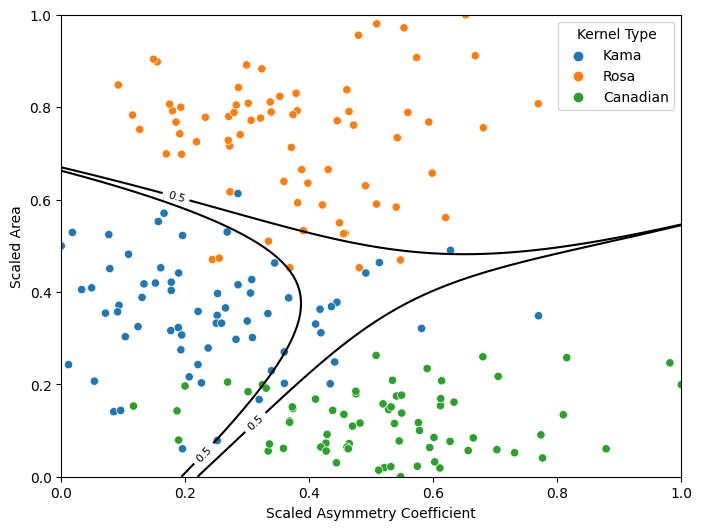

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Scaled Asymmetry Coefficient',y='Scaled Area',hue='Kernel Type', hue_order=['Kama','Rosa','Canadian'])

x1_values = np.linspace(df['Scaled Asymmetry Coefficient'].min(), df['Scaled Asymmetry Coefficient'].max(), 100)
x2_values = np.linspace(df['Scaled Area'].min(), df['Scaled Area'].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
X_poly_grid = poly_features.transform(X_grid)

proba_grid = poly_reg.predict_proba(X_poly_grid)

for i in range(proba_grid.shape[1]):
    proba_class = proba_grid[:, i].reshape(x1_grid.shape)
    contour = plt.contour(x1_grid, x2_grid, proba_class, levels=[0.5], colors='black')
    plt.clabel(contour, inline=True, fontsize=8)
    
plt.ylim(df['Scaled Area'].min(), df['Scaled Area'].max());

This model has a bigger area of uncertainty in the middle, and also drawn the probability lines that include more points from other groups. The polynomial degree had to be also increased to 4 for best results. 

In [42]:
regression_params = poly_reg.coef_
class_labels = ['Kama', 'Rosa', 'Canadian']
feature_names = poly_features.get_feature_names()

print('\nThe model parameters are: \n')
for i, class_label in enumerate(class_labels):
    params = regression_params[i]
    
    print(f'Parameters for {class_label}:')
    for j, param in enumerate(params):
        print(feature_names[j],': ', param)
    print()
    


The model parameters are: 

Parameters for Kama:
1 :  6.233252914193574e-05
x0 :  2.287251909736752
x1 :  -3.88801007738655
x0^2 :  1.6089929202801307
x0 x1 :  -1.077511373081855
x1^2 :  -2.141577451842271
x0^3 :  0.9683059358815272
x0^2 x1 :  -0.3948426471752979
x0 x1^2 :  -0.7259187443136718
x1^3 :  -1.0733115091691023
x0^4 :  0.5672184350957841
x0^3 x1 :  -0.17562670441812905
x0^2 x1^2 :  -0.31169232983383754
x0 x1^3 :  -0.3901749361976412
x1^4 :  -0.5608338414375622

Parameters for Rosa:
1 :  0.0001578050252876676
x0 :  -2.885208659647527
x1 :  1.1063044556307653
x0^2 :  -1.7728592167916215
x0 x1 :  -0.06241740596201417
x1^2 :  -1.2652318659645962
x0^3 :  -0.9323432681215803
x0^2 x1 :  -0.009734121358798357
x0 x1^2 :  -0.4516246180850494
x1^3 :  -1.9841662758039085
x0^4 :  -0.4655861743140907
x0^3 x1 :  0.0413675361095823
x0^2 x1^2 :  -0.11700522080050259
x0 x1^3 :  -0.5897012278932217
x1^4 :  -1.942955715636962

Parameters for Canadian:
1 :  1.8844221071501313e-05
x0 :  0.5760391

<h1>Linear Regression</h1>

Let's see how much effect does the Asymmetry Coefficient have on the Area. First create a model with Width only.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
X = df[['Width of Kernel']].values
y = df['Area'].values

regression_model = LinearRegression()
regression_model.fit(X, y)
y_pred = regression_model.predict(X)

mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
r_squared = regression_model.score(X, y)

print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

Intercept: -9.521203039383924
Coefficients: [7.47827019]
Root Mean Squared Error (RMSE): 0.6966900119600916
R-squared: 0.9423955652825897


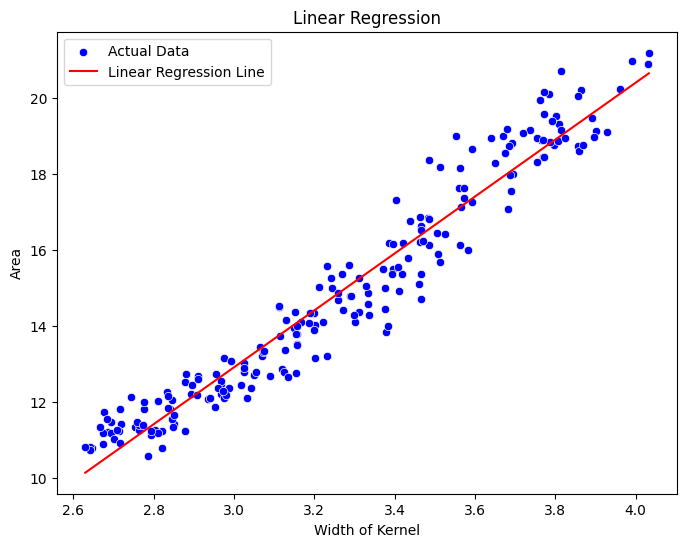

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Width of Kernel'], y=df['Area'], color='blue', label='Actual Data')
sns.lineplot(x=df['Width of Kernel'], y=y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Width of Kernel')
plt.ylabel('Area')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [46]:
X = df[['Width of Kernel', 'Asymmetry Coefficient']].values
y = df['Area'].values

regression_model = LinearRegression()
regression_model.fit(X, y)

y_pred = regression_model.predict(X)

mse2 = np.mean((y - y_pred) ** 2)
rmse2 = np.sqrt(mse2)
r_squared2 = regression_model.score(X, y)

print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared:", r_squared2)

Intercept: -9.826890708234146
Coefficients: [7.52282477 0.04337653]
Root Mean Squared Error (RMSE): 0.6938483702427394
R-squared: 0.942864517994091


In [47]:
print("Ratio of Asymmetry Coefficient not included/ included in model: ", rmse/rmse2)

Ratio of Asymmetry Coefficient not included/ included in model:  1.004095479414844


Conclusion: The asymmetry coef metric does not increase the accuracy of the Linear Regression Model.

<h1>Classification </h1>

The classification is straightforward in this case, the target class is the Wheat type.

In [48]:
features = ['Area','Perimeter',
            'Compactness','Length of Kernel',
            'Width of Kernel','Asymmetry Coefficient',
            'Length of Kernel Groove', 'Classification']

df3 = pd.read_csv('data_23.csv', delimiter=',', names=features, skiprows=1)

I will not include Compactness in the models as that feature provides zero insight in the classes as I learned during clustering. Normalizing the training attributes:

In [49]:
X = df3.drop(['Classification', 'Compactness'], axis=1).values
y = df3['Classification'].values

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X.shape

(210, 6)

Train test splitting with a standard 80/20 train to test ratio, fine-tuning if the perf metrics are unsatisfactory.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


Random Forest Classifier is an ensemble learning method that combines multiple decision trees to make predictions.
It is known for its ability to handle complex relationships between features and the target variable.
It can handle both binary and multi-class classification tasks, therefore a suitable model to diferentiate the wheat classes.

Multi-Layer Perceptron (MLP), are a class of models inspired by the structure of biological neural networks.
It consists of multiple layers of interconnected neurons, where each neuron performs a weighted sum of inputs followed by a non-linear activation function.
It can learn complex non-linear relationships between features and the target variable.
MLP can also handle both binary and multiclass classification tasks.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=10000)

Random Forest Classifier Metrics:
Accuracy: 0.9048
Precision: 0.9126
Recall: 0.9048
F1-Score: 0.9058


Neural Networks (MLP) Metrics:
Accuracy: 0.9524
Precision: 0.9524
Recall: 0.9524
F1-Score: 0.9524




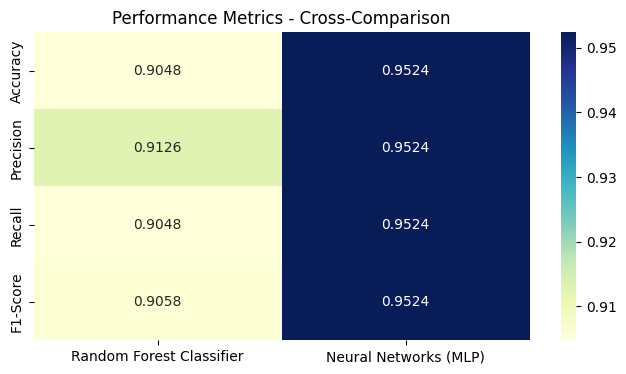

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_metrics = {
    'Accuracy': accuracy_score(y_test, random_forest.predict(X_test)),
    'Precision': precision_score(y_test, random_forest.predict(X_test), average='weighted'),
    'Recall': recall_score(y_test, random_forest.predict(X_test), average='weighted'),
    'F1-Score': f1_score(y_test, random_forest.predict(X_test), average='weighted')
}

mlp_metrics = {
    'Accuracy': accuracy_score(y_test, mlp.predict(X_test)),
    'Precision': precision_score(y_test, mlp.predict(X_test), average='weighted'),
    'Recall': recall_score(y_test, mlp.predict(X_test), average='weighted'),
    'F1-Score': f1_score(y_test, mlp.predict(X_test), average='weighted')
}

print("Random Forest Classifier Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\n")

print("Neural Networks (MLP) Metrics:")
for metric, value in mlp_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\n")

metrics_df = pd.DataFrame({'Random Forest Classifier': rf_metrics, 'Neural Networks (MLP)': mlp_metrics})

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt='.4f')
plt.title('Performance Metrics - Cross-Comparison')
plt.show()

Both models have surprisingly good performance metrics, and the MLP has the edge over the Random Forest with above 92% results across the 4 metrics. The geometric measurements were likely recorded precisely, with little to no noise, and we can conclude that the different Wheat types are easily and with great precision can be divided into their respective classes.